# Exploratory analysis of pokemon data!

In [39]:
import pandas as pd

pokemon_data = pd.read_csv('pokemon.csv')
pokemon_data = pokemon_data.drop(['japanese_name'], axis = 1) # We don't need japanese_name column for our analysis
pokemon_data.head(5)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


We have 801 rows of Pokemon across 7 generations of games. There are 40 columns for each Pokemon, 18 of which are that Pokemon's type effectiveness damage taken from other types.

First, let's visualize the number of Pokemon added per each generation. We're interested in seeing how each generation's makeup of Pokemon changes.

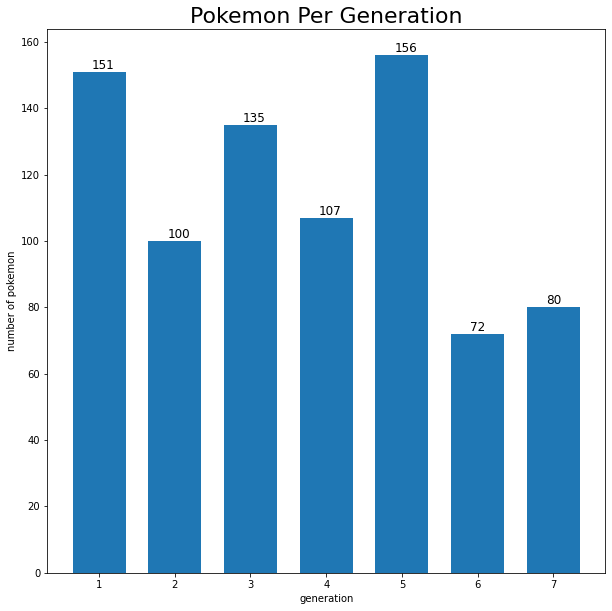

In [4]:
# lets grab some visualization libraries for some simple visualizations of our data
import matplotlib.pyplot as plt
import seaborn as sns



# grab only the name column for each generation so we have a definitive count
poke_by_generation = pokemon_data.groupby('generation').count().name 

plt.figure(figsize=(10, 10))
bars = plt.bar(range(1 , len(poke_by_generation) + 1), poke_by_generation, width=0.7)

# add some formatting to our plot
plt.ylabel("number of pokemon")
plt.xlabel("generation")
plt.title(label="Pokemon Per Generation", loc="center", fontsize=22)

for bar in bars:
    yval = bar.get_height()
    plt.text(x = bar.get_x()+0.25, y = yval, s= yval, va='bottom', fontsize=12) # bottom vertical alignment so the number doesn't touch the bar

plt.show()




# How does pokemon height and weight correlate to its base stats? 

### Pokemon have 6 stat values \['hp, 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed'\] We would like to know if these stats are in any way correlated to the base height or weight of the pokemon.

#### This is a good opportunity to produce a heatmap visualization to clearly see how those variables correlate.

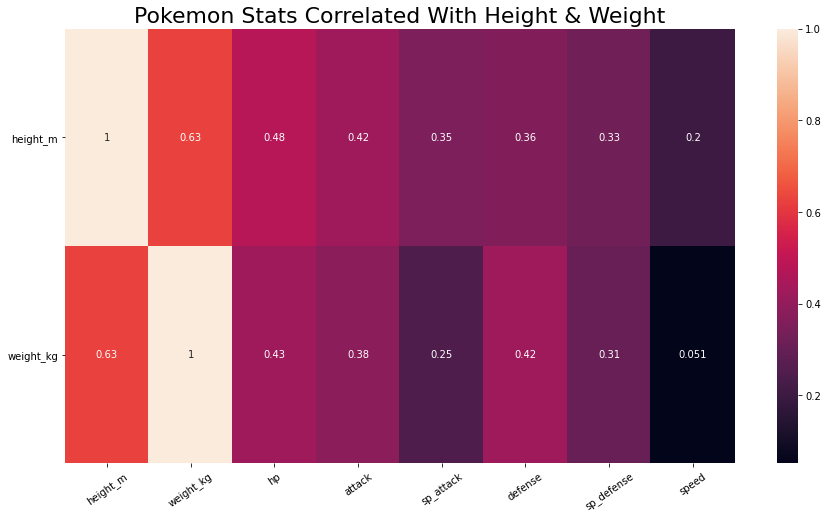

In [5]:
columns_of_interest = ['height_m', 'weight_kg', 'hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']
corr_data = pokemon_data[columns_of_interest]

corr_data = corr_data.dropna()

import numpy as np
correlation_coefficients = np.corrcoef( corr_data, rowvar=False )


plt.figure(figsize=(15,8))
sns.heatmap( correlation_coefficients[0:2], annot=True ) # index from 0:2 because we only want to see corrolations between height and weight
plt.xticks( np.arange(8)+0.5, corr_data.columns, rotation = 35 )
plt.yticks( np.arange(2)+0.5, corr_data.columns[0:2], rotation = 0 )
plt.title(label="Pokemon Stats Correlated With Height & Weight", loc="center", fontsize=22)
plt.show()


### Results
After looking at our heatmap, it is clear that there is a correlation between the height and weight of a Pokemon. Logically, this makes sense. We would assume as a Pokemon is taller it is heavier.

There is also a weak to moderately-strong correlations between height and weight and the various combat stats. This makes sense because bigger Pokemon tend to be the more evolved and stronger versions of smaller Pokemon.

We had to drop 20 rows to get the above heatmap due to NaN's in the height and weight columns. We take a look at the Pokemon that we had to drop here. As you can see, the vast majority of them are from Generation 1.

In [40]:
pokemon_data.loc[pokemon_data['weight_kg'].isna()][['name', 'generation']]

,name,generation
18,Rattata,1
19,Raticate,1
25,Raichu,1
26,Sandshrew,1
27,Sandslash,1
36,Vulpix,1
37,Ninetales,1
49,Diglett,1
50,Dugtrio,1
51,Meowth,1


### Legendary Pokemon may skew the results.

Legendary Pokemon may skew the results of our correlation. This is because their total base stats are much higher than regular Pokemon but may not necessarily be much different in size. (Some are incredibly huge such as Primal Kyogre, but some are also incredibly small such as Jirachi)

Therefore, we will try to calculate coefficients again, but this time splitting Legendary and non-Legendary Pokemon into different groups. Hopefully this will lead to stronger correlation values in either of the two groups.

In [36]:
legendary = pokemon_data[pokemon_data['is_legendary'] == True]
non_legendary = pokemon_data[pokemon_data['is_legendary'] == False]

There are 70 legendary Pokemon in our dataset of 800 Pokemon. If we calculate the correlation coefficients again with these two datasets separately, maybe our return coefficients will be stronger.

First let's try producing the correlation heatmap for non-legendary Pokemon.

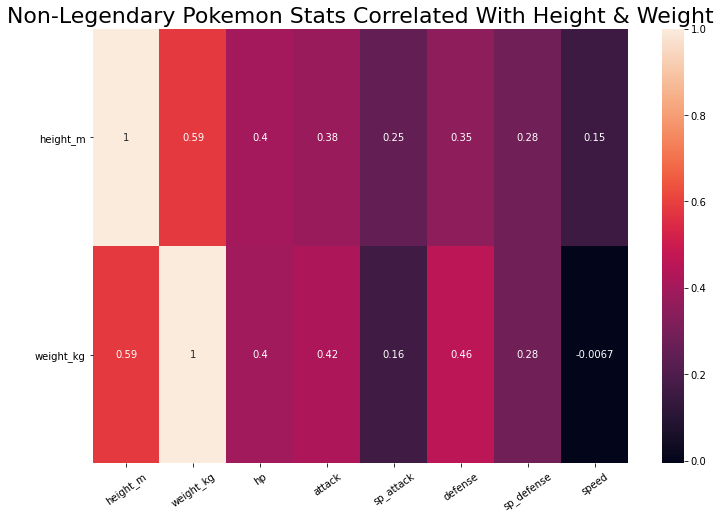

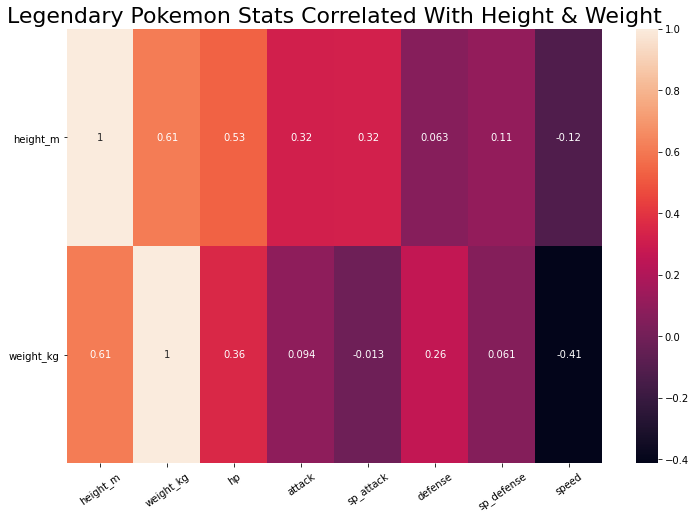

In [35]:
corr_data_legendary = legendary[columns_of_interest].dropna()
corr_data_non_legendary = non_legendary[columns_of_interest].dropna()

plt.figure(figsize=(12,8))
correlation_coefficients = np.corrcoef( corr_data_non_legendary, rowvar=False )
sns.heatmap( correlation_coefficients[0:2], annot=True ) # index from 0:2 because we only want to see corrolations between height and weight
plt.xticks( np.arange(8)+0.5, corr_data.columns, rotation = 35 )
plt.yticks( np.arange(2)+0.5, corr_data.columns[0:2], rotation = 0 )
plt.title(label="Non-Legendary Pokemon Stats Correlated With Height & Weight", loc="center", fontsize=22)
plt.show()

plt.figure(figsize=(12,8))
correlation_coefficients = np.corrcoef( corr_data_legendary, rowvar=False )
sns.heatmap( correlation_coefficients[0:2], annot=True ) # index from 0:2 because we only want to see corrolations between height and weight
plt.xticks( np.arange(8)+0.5, corr_data.columns, rotation = 35 )
plt.yticks( np.arange(2)+0.5, corr_data.columns[0:2], rotation = 0 )
plt.title(label="Legendary Pokemon Stats Correlated With Height & Weight", loc="center", fontsize=22)
plt.show()



### Results
Subsetting by Legendary Pokemon shows that Legendary Pokemon have much weaker correlations between their size and their actual power.
Notably, the correlation coefficients between height_m and defense and speed are very close to 0, as well as the correlation coefficients between weight_kg and attack, sp_attack, and sp_defense. 

The only exceptions are between height_m and hp, indicating a moderately-strong correlation that taller Legendary Pokemon tend to have more health points, and between weight_kg and speed, showing a weak-to-moderately-strong correlation that heavier Pokemon tend to be slower.

Most interestingly, subsetting by legendaries did not appear to improve the correlation between size and power in Non-Legendary Pokemon. In many cases, these correlations got weaker instead.

### Dashboard
We want to create a dashboard that shows you Pokemon that closest to your inputed height and weight, including showing an image of said Pokemon.

We will need to pull requests from PokeAPI to retrieve these images. We will append the links of these images to our existing pokemon_data DataFrame so that we do not have to make a request to the API everytime a user enters their height and weight.

#### Our dashboard is hosted on Heroku [HERE](https://blooming-beyond-75995.herokuapp.com/) and the codebase is on Github [HERE](https://github.com/zfeldman7/pokemon-size-dashboard)

In [7]:
import requests # we will use the requests library to call the pokeapi
import json # the response will be easier to work with in JSON, so we opt for the library

# loop through all of our pokedex entries
for pokedex_entry in range(1, pokemon_data.shape[0]):
    # make a request to the amazing pokeapi!
    request_url = 'https://pokeapi.co/api/v2/pokemon/' + str(pokedex_entry) 
    response = requests.get(request_url)
    # make our JSON response into a python dictionary for ease of mutability
    full_response = json.loads(response.text)
    image_url = full_response['sprites']['front_default'] # extract the default image URL from the dictionary
    pokemon_data.loc[pokedex_entry -1, 'image_url'] = image_url # append to the correct index in the dataframe


In [8]:
# Exporting the csv to be used in our dashboard application
pokemon_data.to_csv('pokemon_data.csv')